In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
import seaborn as sns
import scipy


from IPython.display import HTML

# Assessing the relative impacts of constraints and calibrations on dating accuracy

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Analysis of 800 MCMC runs on simulated data. 
The simulation was performed on 10 different trees, used to generate alignments. For each tree, we gathered up to 5 calibration points (0, 1, 3, 5), and up to 5 constraints (0, 1, 3, 5). We ran the MCMC in each combination of conditions (=16 combinations), in 5 replicates, changing the nature of the calibrations and constraints. So in total we have $10~trees*16~conditions*5~replicates=800~points$.

## Reading the data

In [52]:

colNames = ["treeId","numCalib","numCons","numReplicate","correlation", "rmsd", "correlation_bl", "rmsd_bl", "numNodes","numInHPD","fracInHPD","percent0","percent25","percent50","percent75","percent100"]
d = pd.read_csv ("resultAllTrees.txt", sep="\t", header=None, names=colNames)


In [53]:
d.describe()


,treeId,numCalib,numCons,numReplicate,correlation,rmsd,correlation_bl,rmsd_bl,numNodes,numInHPD,fracInHPD,percent0,percent25,percent50,percent75,percent100
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.0,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,5.493185,2.221809,3.453532,2.964064,0.879407,3.173555,0.663324,2.508961,29.0,21.944238,75.669786,0.685938,2.922134,4.667950,6.361106,8.722972
std,2.873623,1.928401,10.988151,1.446292,0.075069,1.896199,0.145286,1.116477,0.0,4.278530,14.753552,0.222735,1.001510,1.496446,2.064386,3.387293
min,1.000000,0.000000,0.000000,0.000000,0.606824,0.444335,0.169987,0.556378,29.0,4.000000,13.793103,0.008700,0.263751,0.403635,0.514055,0.664912
25%,3.000000,0.000000,1.000000,2.000000,0.844627,1.902160,0.572730,1.810623,29.0,19.000000,65.517241,0.560650,2.234251,3.583128,5.017914,6.525724
50%,5.000000,1.000000,3.000000,3.000000,0.890185,2.885526,0.668358,2.377053,29.0,21.000000,72.413793,0.669000,2.772384,4.246994,5.798840,7.728945
75%,8.000000,3.000000,5.000000,4.000000,0.940326,3.686664,0.782085,2.994718,29.0,26.000000,89.655172,0.766550,3.523032,5.610462,7.233969,9.542786
max,10.000000,5.000000,100.000000,5.000000,0.995693,12.070103,0.961315,7.265291,29.0,29.000000,100.000000,1.245100,6.773768,11.375833,14.228750,20.732230


## Analysis of the impact of constraints
In the following 6 plots, we investigate the impact of constraints, not controlling for the number of calibrations.

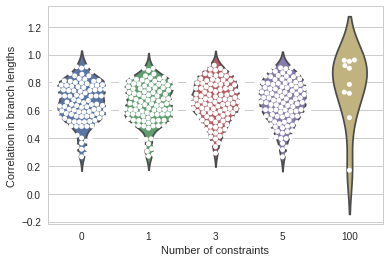

In [54]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["correlation_bl"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["correlation_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Correlation in branch lengths')

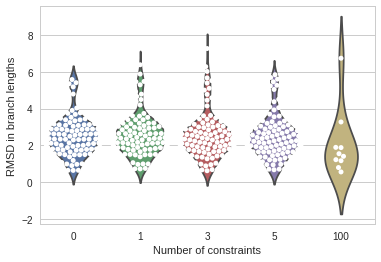

In [55]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["rmsd_bl"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["rmsd_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='RMSD in branch lengths')

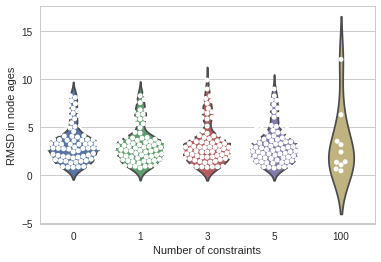

In [56]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["rmsd"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["rmsd"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='RMSD in node ages')

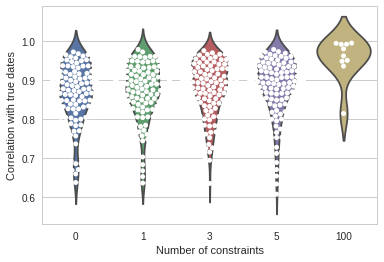

In [57]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Correlation with true dates')

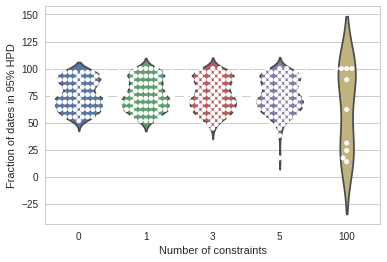

In [58]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Fraction of dates in 95% HPD')

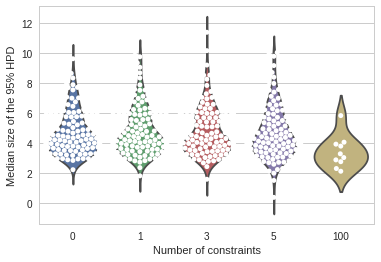

In [59]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["percent50"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["percent50"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Median size of the 95% HPD')

### Partial conclusion on the above
As the number of constraints increases from 0 to 5, the accuracy of the reconstruction improves a little bit, despite smaller 95%HPD. Using all constraints available, we get usually better results, and smaller 95%HOD.

## Analysis of the impact of calibrations
In the following 6 plots, we investigate the impact of calibrations, not controlling for the number of constraints.

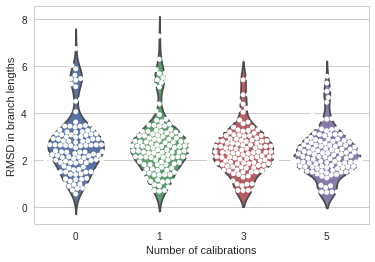

In [60]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["rmsd_bl"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["rmsd_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='RMSD in branch lengths')

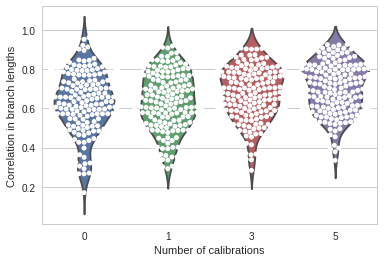

In [61]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["correlation_bl"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["correlation_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Correlation in branch lengths')

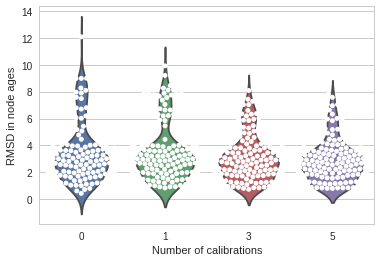

In [62]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["rmsd"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["rmsd"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='RMSD in node ages')

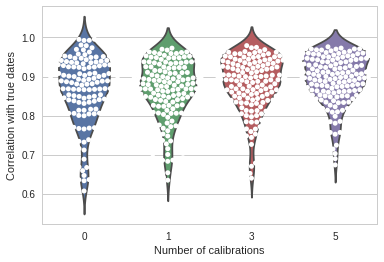

In [63]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Correlation with true dates')

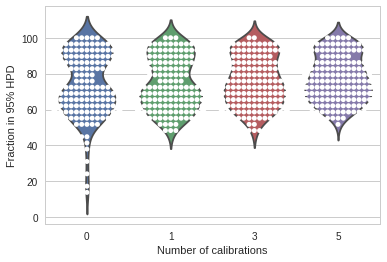

In [64]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Fraction in 95% HPD')

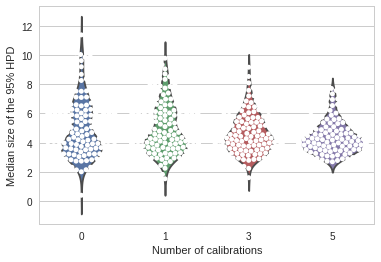

In [65]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["percent50"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["percent50"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Median size of the 95% HPD')

### Partial conclusion on the above
As the number of calibrations increases from 0 to 5, the accuracy of the reconstruction improves, despite smaller 95%HPD. The effect of calibrations seems stronger than that of constraints.

## Let's look at constraints, controlling for calibrations
In the following 10 plots, we separate the impacts of constraints and calibrations.

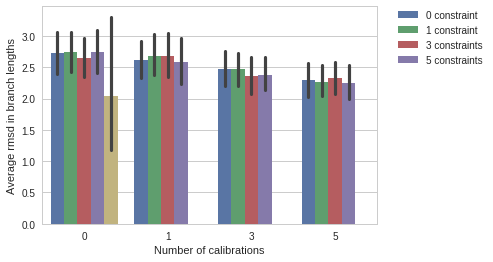

In [66]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd_bl", x="numCalib", data=d)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in branch lengths')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

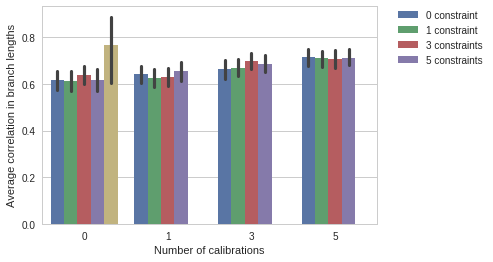

In [67]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation_bl", x="numCalib", data=d)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in branch lengths')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

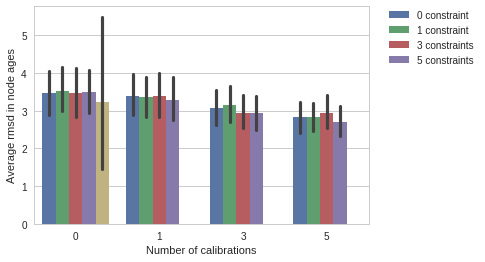

In [68]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd", x="numCalib", data=d)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in node ages')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

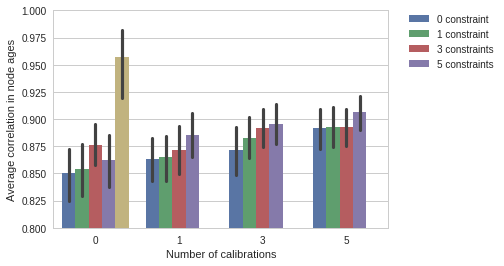

In [69]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d)
ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in node ages')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

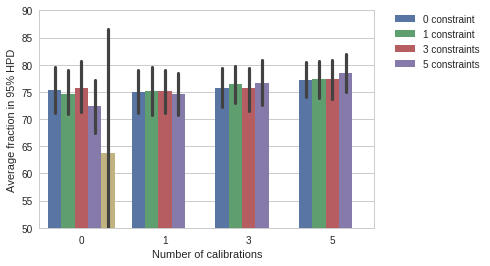

In [70]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="fracInHPD", x="numCalib", data=d)
ax.set_ylim(50, 90)
ax.set(xlabel='Number of calibrations', ylabel='Average fraction in 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

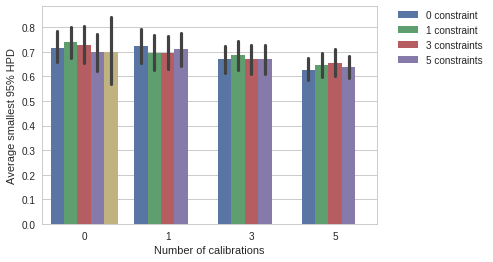

In [71]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent0", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average smallest 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

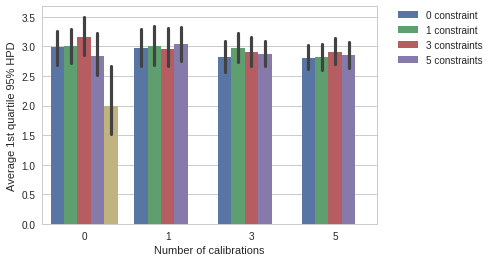

In [72]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent25", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average 1st quartile 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

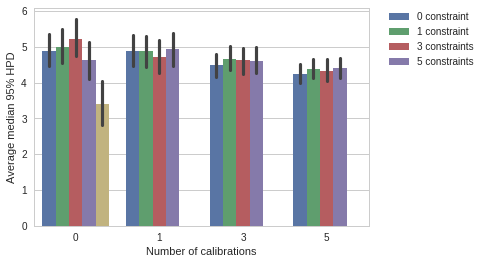

In [73]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent50", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average median 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

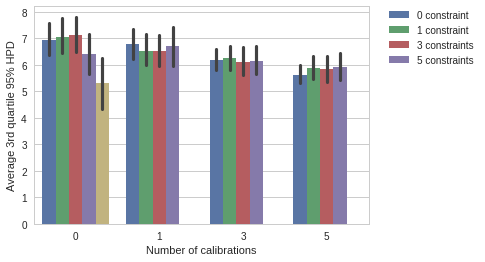

In [74]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent75", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average 3rd quartile 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

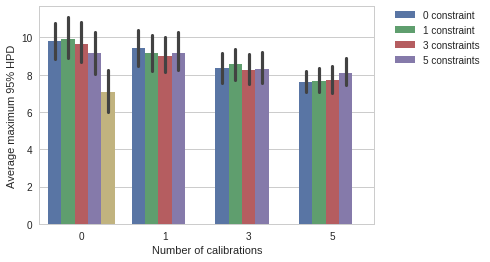

In [75]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent100", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average maximum 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

### Partial conclusion on the above
Constraints and calibrations both improve accuracy. The number of constraints does not seem to have much of an effect on the size of the 95% HPD, contrary to calibrations. However, when using all constraints, resulyts are much improved, although with a lot of variance. It is possible that on some trees convergence was difficult in the fully constrained runs.

## Comparison between trees
In the following 6 plots, we look at the impact of the 10 different trees.

First let's order the trees from good to bad according to the correlation in node ages when all constraints are used:

In [106]:
d_sel = d.loc[d['numCons'] == 100]
print(d_sel.sort_values(['correlation'], ascending=False))

     treeId  numCalib  numCons  numReplicate  correlation       rmsd  \
242       3         0      100             0     0.995693   0.444335   
646       8         0      100             0     0.995115   0.630101   
403       5         0      100             0     0.992704   1.054818   
725       9         0      100             0     0.992442   1.380285   
80        1         0      100             0     0.980810   1.329130   
565       7         0      100             0     0.962720   2.407002   
322       4         0      100             0     0.951231   3.174121   
161       2         0      100             0     0.948844   6.296218   
806      10         0      100             0     0.936484   3.525262   
484       6         0      100             0     0.814335  12.070103   

     correlation_bl   rmsd_bl  numNodes  numInHPD   fracInHPD  percent0  \
242        0.951570  0.556378        29      29.0  100.000000    0.6445   
646        0.961315  0.794275        29      29.0  100.00

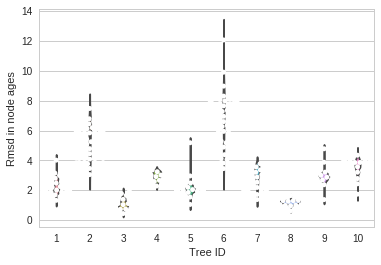

In [76]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["rmsd"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["rmsd"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Rmsd in node ages')


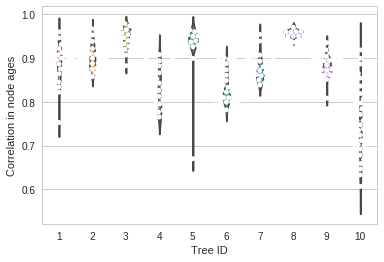

In [28]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Correlation in node ages')


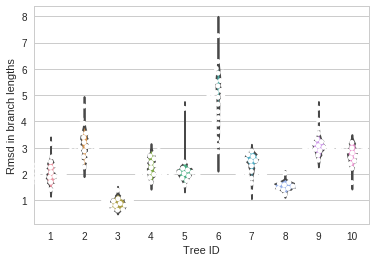

In [29]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["rmsd_bl"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["rmsd_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Rmsd in branch lengths')


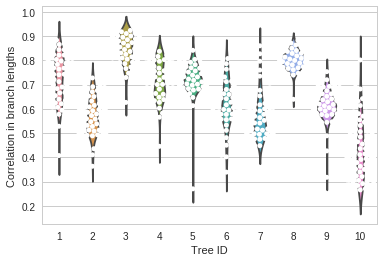

In [30]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["correlation_bl"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["correlation_bl"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Correlation in branch lengths')


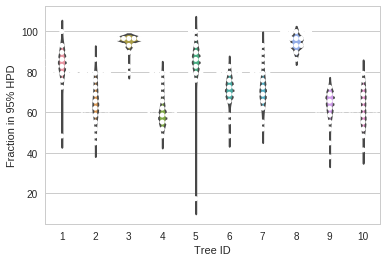

In [31]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Fraction in 95% HPD')


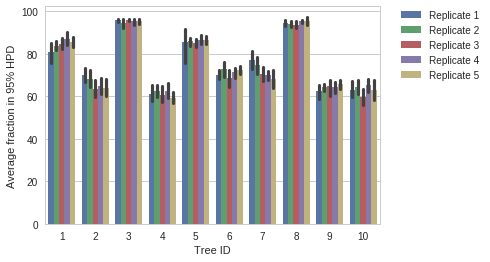

In [32]:
%matplotlib inline
ax = sns.barplot(hue="numReplicate", y="fracInHPD", x="treeId", data=d)
ax.set(xlabel='Tree ID', ylabel='Average fraction in 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["Replicate 1", "Replicate 2", "Replicate 3", "Replicate 4", "Replicate 5"])

### Partial conclusion on the above
Some trees are consistently easy, some consistently hard, even when we use all constraints.
If we had to order the trees from easy to hard, I'd say:
3 8 1 5 4 7 9 10 2 6

## Results obtained on easy trees 3 and 8

In [77]:
d_easy = d.loc[d['treeId'].isin([3,8])]
d_easy.describe()

,treeId,numCalib,numCons,numReplicate,correlation,rmsd,correlation_bl,rmsd_bl,numNodes,numInHPD,fracInHPD,percent0,percent25,percent50,percent75,percent100
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.500000,2.222222,3.456790,2.962963,0.954762,1.159460,0.827097,1.210875,29.0,27.555556,95.019157,0.623403,2.978936,3.720355,4.808391,5.941748
std,2.507752,1.930468,10.995255,1.448447,0.016125,0.213618,0.058125,0.364262,0.0,0.884652,3.050523,0.062033,0.550941,0.492613,0.670016,0.659998
min,3.000000,0.000000,0.000000,0.000000,0.882652,0.444335,0.626717,0.556378,29.0,23.000000,79.310345,0.424900,1.704318,2.153681,3.006229,3.936944
25%,3.000000,0.000000,1.000000,2.000000,0.950564,1.012080,0.789701,0.878246,29.0,27.000000,93.103448,0.572700,2.508691,3.318917,4.301543,5.431306
50%,5.500000,1.000000,3.000000,3.000000,0.958260,1.188650,0.818515,1.226622,29.0,28.000000,96.551724,0.622700,2.888896,3.767397,4.853609,6.092267
75%,8.000000,3.000000,5.000000,4.000000,0.963880,1.261752,0.868982,1.547021,29.0,28.000000,96.551724,0.679050,3.463761,4.111380,5.314891,6.474315
max,8.000000,5.000000,100.000000,5.000000,0.995693,1.928901,0.961315,2.030719,29.0,29.000000,100.000000,0.794900,4.267020,4.989692,5.994492,7.152224


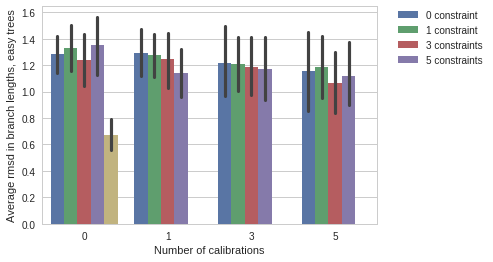

In [78]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd_bl", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in branch lengths, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

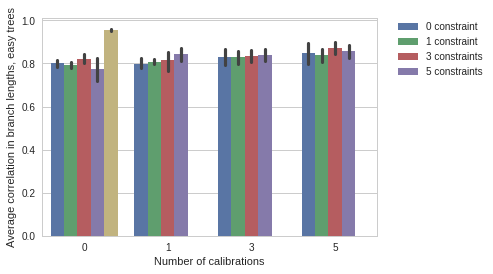

In [79]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation_bl", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in branch lengths, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

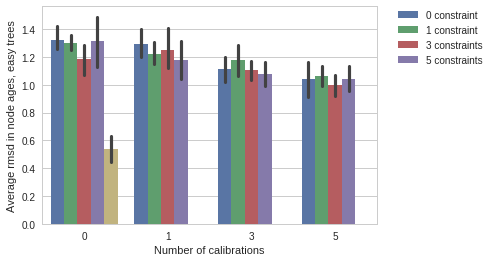

In [80]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in node ages, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

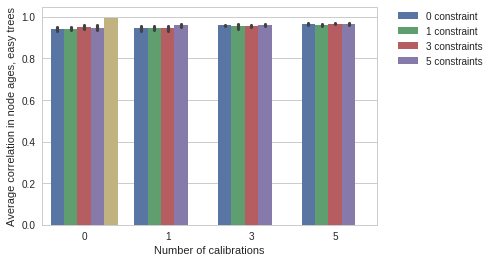

In [81]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d_easy)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in node ages, easy trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

## Results obtained on hard trees 2 and 10
I decided against tree 6 where variance of the different runs is too wide.

In [82]:
d_hard = d.loc[d['treeId'].isin([2,10])]
d_hard.describe()

,treeId,numCalib,numCons,numReplicate,correlation,rmsd,correlation_bl,rmsd_bl,numNodes,numInHPD,fracInHPD,percent0,percent25,percent50,percent75,percent100
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,6.000000,2.222222,3.456790,2.962963,0.818414,4.536523,0.502921,2.927529,29.0,18.537037,63.920817,0.902948,3.323486,5.555603,7.931746,11.216877
std,4.012403,1.930468,10.995255,1.448447,0.101219,1.326796,0.121820,0.421953,0.0,2.784471,9.601624,0.228094,1.618114,2.147070,2.545072,3.434561
min,2.000000,0.000000,0.000000,0.000000,0.606824,1.743655,0.265948,1.672157,29.0,4.000000,13.793103,0.193400,0.872551,2.012098,3.424488,4.513335
25%,2.000000,0.000000,1.000000,2.000000,0.732480,3.629355,0.410824,2.639515,29.0,17.000000,58.620690,0.747675,1.869166,3.769097,5.931442,8.601693
50%,6.000000,1.000000,3.000000,3.000000,0.868658,4.000707,0.515092,2.889215,29.0,19.000000,65.517241,0.838721,3.132583,5.232630,7.379397,10.274702
75%,10.000000,3.000000,5.000000,4.000000,0.900906,5.874756,0.587545,3.215531,29.0,20.000000,68.965517,1.135375,4.721785,7.184042,9.766061,14.380340
max,10.000000,5.000000,100.000000,5.000000,0.967897,7.482673,0.801718,4.584068,29.0,25.000000,86.206897,1.245100,6.773768,11.375833,14.228750,17.571662


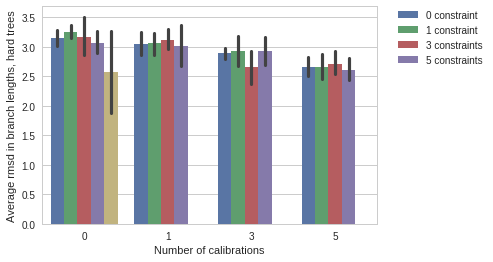

In [83]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd_bl", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in branch lengths, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

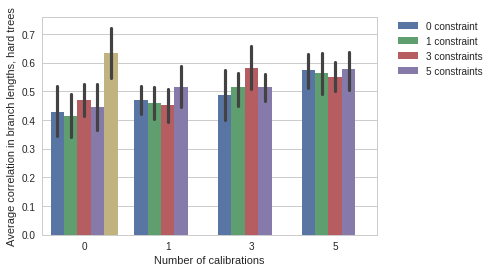

In [84]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation_bl", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in branch lengths, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

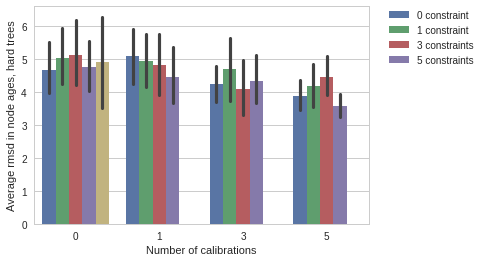

In [85]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="rmsd", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average rmsd in node ages, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

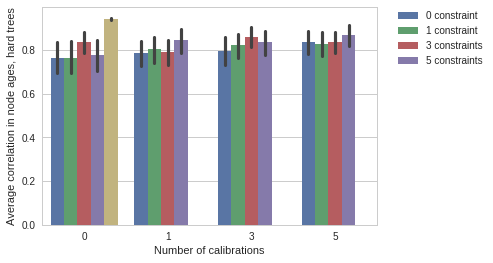

In [86]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d_hard)
#ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation in node ages, hard trees')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

### Partial conclusion on the above
Constraints seem to help a little bit more on the easy trees than on the hard trees, but the effect is not massive. With all constraints, we see a nice improvement in both cases, but more variance on the two hard trees.

## Variation among replicates, controlling for a given set of conditions, focusing on constraints
For a given number of constraints, calibrations, and a given tree, we want to assess how variable the results are, focusing on the impact of calibrations (whose number has been color-coded).

In [87]:

#groupedByReplicates = d.groupby(["treeId","numCalib","numCons"], group_keys=True)
#groupedByReplicates.describe()

#groupedByReplicates.columns = ["_".join(x) for x in groupedByReplicates.columns.ravel()]
#groupedByReplicates.describe()

#groupedByReplicates["correlation"]

cors=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["correlation"].std()}).reset_index()
#cors.head(32)

    #pd.boxplot_frame_groupby(groupedByReplicates)
#groupedByReplicates["correlation"].boxplot()
#print(d.groupby(["treeId","numCalib","numCons"])["correlation"].var().unstack())
#d.groupby(["treeId","numCalib","numCons"])["correlation"].var().unstack().boxplot()

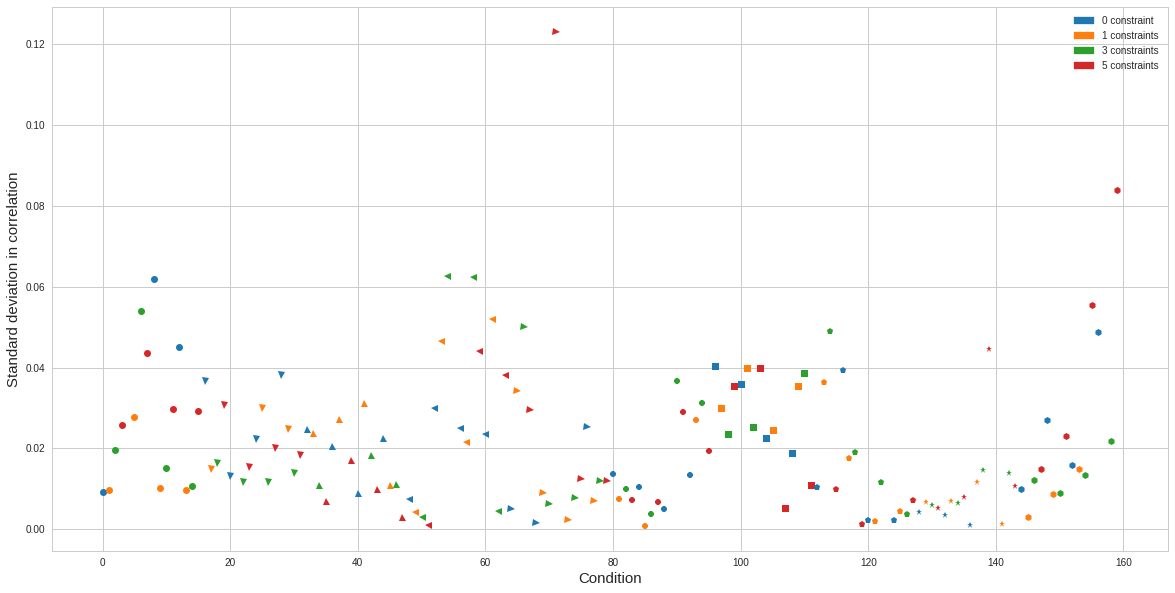

In [88]:
%matplotlib inline

# Select the color map named rainbow
cmap = plt.cm.get_cmap(name='tab10')


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, cors["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in correlation", fontsize=15)


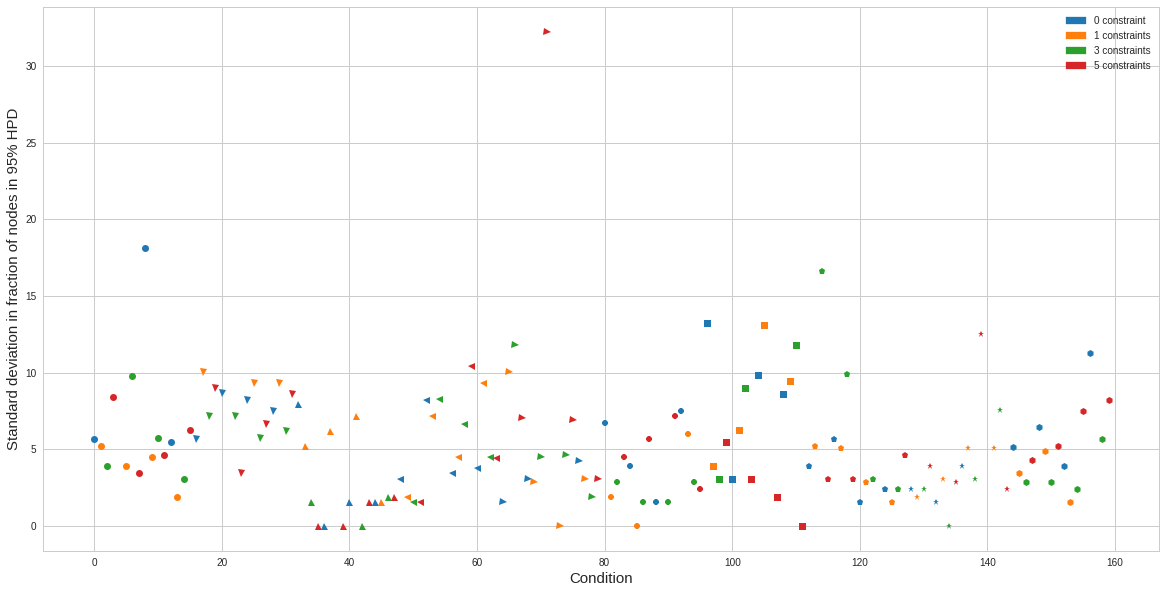

In [89]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["fracInHPD"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, fracInHPD["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in fraction of nodes in 95% HPD", fontsize=15)


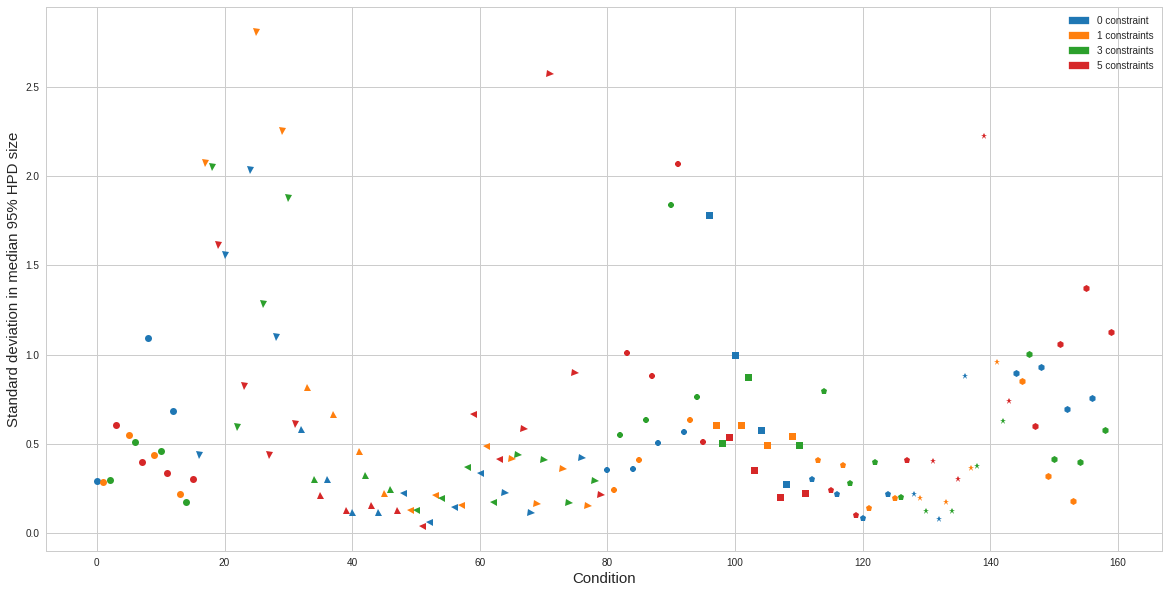

In [90]:
%matplotlib inline

percent50=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["percent50"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, percent50["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in median 95% HPD size", fontsize=15)


### Partial conclusion on the above
It's hard to come up with much to say about the above graphs, except that even controlling for a given number of constraints on a given tree, there can be variation in the accuracy or the 95% HPD. This is expected given that constraints could be positioned on different nodes of the tree.

## Variation among replicates, controlling for a given set of conditions, focusing on calibrations
For a given number of constraints, calibrations, and a given tree, we want to assess how variable the results are, focusing on the impact of calibrations (whose number has been color-coded).

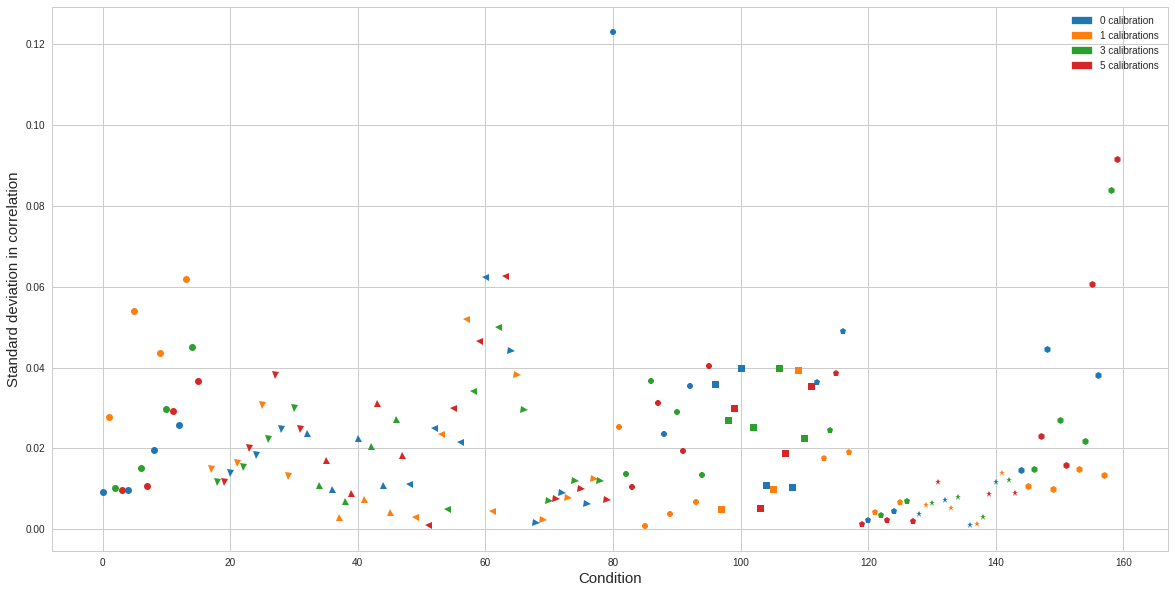

In [91]:
%matplotlib inline


cors=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["correlation"].std()}).reset_index()

cors.head(32)

# Select the color map named rainbow
cmap = plt.cm.get_cmap(name='tab10')


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, cors["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in correlation", fontsize=15)


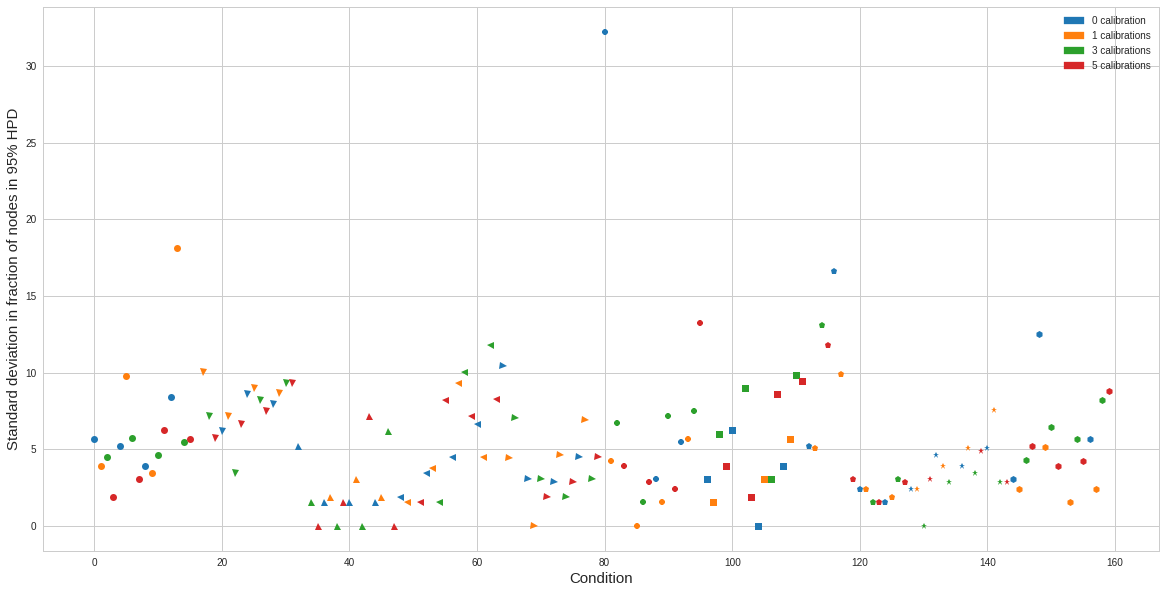

In [92]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["fracInHPD"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, fracInHPD["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in fraction of nodes in 95% HPD", fontsize=15)


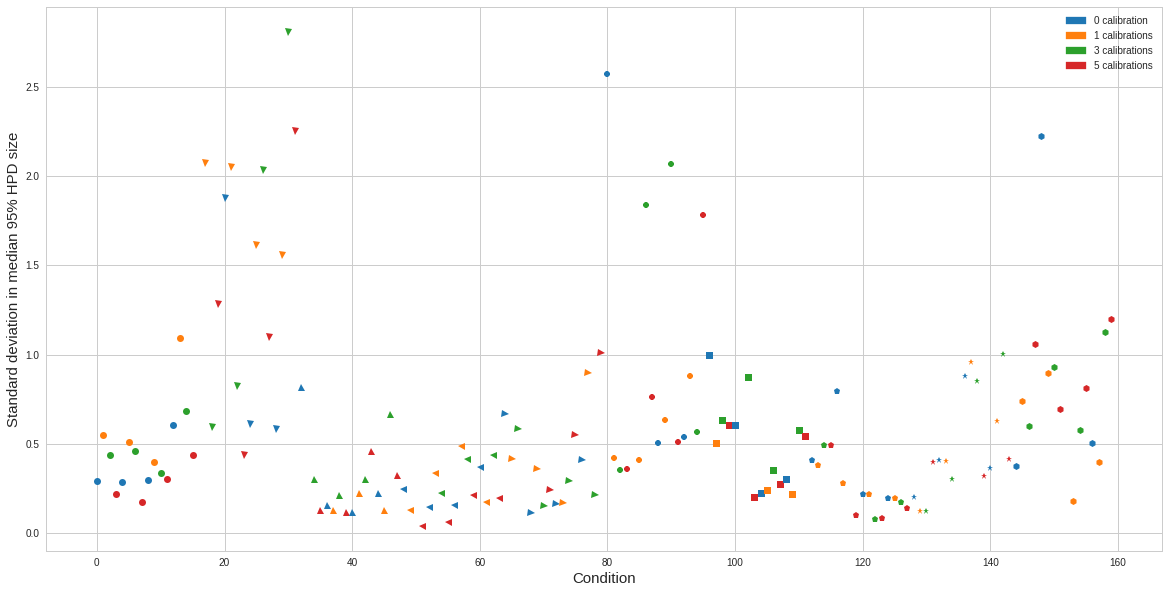

In [93]:
%matplotlib inline

percent50=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["percent50"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, percent50["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in median 95% HPD size", fontsize=15)


### Partial conclusion on the above
Similarly to the analyses focusing on the number of constraints, there can be some variation in some conditions, even with 5 calibrations.

## Analysis of mixing in a random replicate
Here we just look at how well the MCMC seems to mix in a particular example. I also did another test based on replicate runs, and it seemed OK.

This could be systematized by looking at all runs.

In [99]:
d1=pd.read_csv ("output/9_0_0_1.log", sep="\t")
d1.describe()


,Iteration,Posterior,Likelihood,Prior,birth_rate,branch_rates[1],branch_rates[2],branch_rates[3],branch_rates[4],branch_rates[5],...,tmrca_clade_10,tmrca_clade_2,tmrca_clade_3,tmrca_clade_4,tmrca_clade_5,tmrca_clade_6,tmrca_clade_7,tmrca_clade_8,tmrca_clade_9,turnover
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05,100001.000000,1.000010e+05,100001.000000,100001.000000,...,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,500000.000000,-10277.750010,-10267.702320,-10.047679,0.268629,1.369062e-02,0.044342,2.210342e-02,0.012233,0.014318,...,1.204884,7.713279,2.738032,14.068897,6.290619,11.167908,1.203424,9.628722,10.854167,0.999767
std,288679.464718,8.842572,5.222843,7.207409,0.111988,1.881635e-02,0.042685,2.737094e-02,0.012360,0.011875,...,1.253936,2.883104,1.658849,2.327793,1.988694,2.292023,1.174624,2.186187,2.431451,0.000091
min,0.000000,-10336.600000,-10295.300000,-64.400300,0.060821,1.347190e-08,0.000041,1.708110e-08,0.000050,0.000633,...,0.039021,1.066391,0.166870,3.168604,1.104605,2.306216,0.035981,2.108720,2.277826,0.999114
25%,250000.000000,-10283.200000,-10271.000000,-14.184000,0.191072,2.629750e-03,0.015675,4.809410e-03,0.004402,0.006470,...,0.449670,5.503828,1.546712,12.671600,4.840493,9.626789,0.501283,8.111850,9.190199,0.999718
50%,500000.000000,-10277.100000,-10267.400000,-9.196040,0.246187,7.239890e-03,0.031817,1.285050e-02,0.008426,0.011231,...,0.814156,7.409297,2.346522,14.389370,6.101860,11.286390,0.858698,9.649378,10.938230,0.999781
75%,750000.000000,-10271.600000,-10264.000000,-4.974130,0.317881,1.707500e-02,0.058773,2.887370e-02,0.015672,0.018479,...,1.503677,9.696138,3.501304,15.799000,7.561159,12.823110,1.486925,11.164940,12.615570,0.999831
max,1000000.000000,-10250.300000,-10249.000000,9.768830,1.152004,4.515650e-01,0.949185,4.707240e-01,0.261975,0.184515,...,18.509390,17.401860,14.194970,19.177600,15.092220,18.085200,17.446260,16.922650,18.513980,0.999953


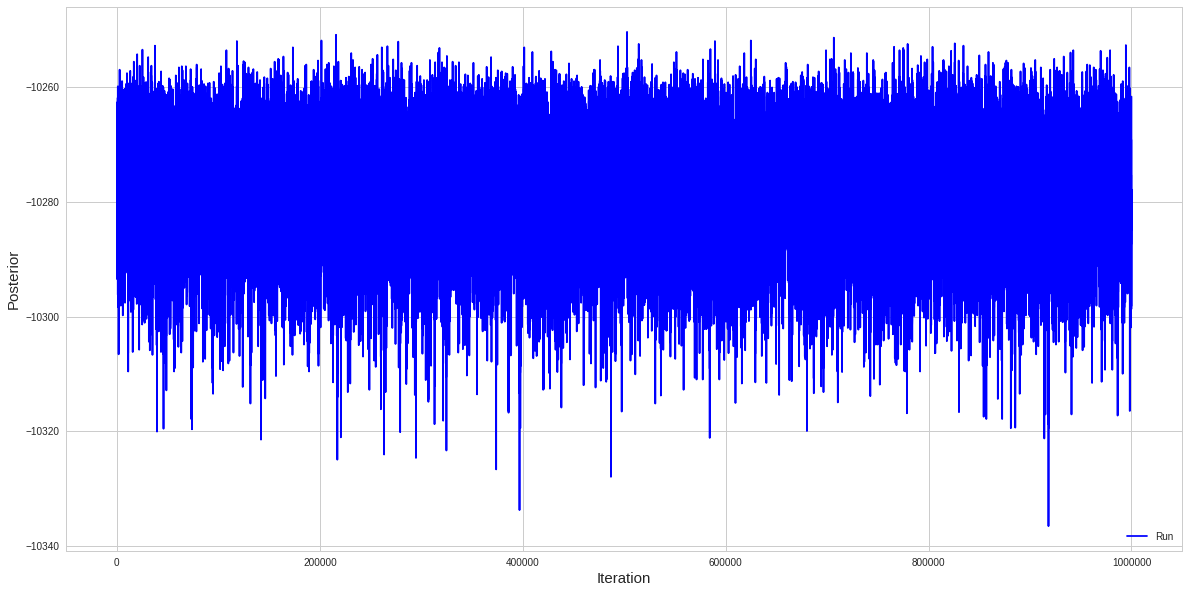

In [100]:
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(20, 10))
cl, = ax.plot(d1['Iteration'], d1['Posterior'], 'b-')
#cal, = ax[1].plot(d2['Iteration'], d2['Posterior'], 'g-')
#con, = ax[2].plot(d3['Iteration'], d3['Posterior'], 'r-')

ax.legend([cl], ['Run'], loc='lower right')
#ax[1].legend([cal], ['Run 2'], loc='lower right')
#ax[2].legend([con], ['Run 3'], loc='lower right')

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Posterior", fontsize=15);

From this very quick look, the mixing does not seem problematic.

## Analysis of mixing in the fully constrained runs

In [95]:
d1=pd.read_csv ("output/tree_1_all_constraints.log", sep="\t")
d1.describe()
d2=pd.read_csv ("output/tree_2_all_constraints.log", sep="\t")
d3=pd.read_csv ("output/tree_3_all_constraints.log", sep="\t")
d4=pd.read_csv ("output/tree_4_all_constraints.log", sep="\t")
d5=pd.read_csv ("output/tree_5_all_constraints.log", sep="\t")
d6=pd.read_csv ("output/tree_6_all_constraints.log", sep="\t")
d7=pd.read_csv ("output/tree_7_all_constraints.log", sep="\t")
d8=pd.read_csv ("output/tree_8_all_constraints.log", sep="\t")
d9=pd.read_csv ("output/tree_9_all_constraints.log", sep="\t")
d10=pd.read_csv ("output/tree_10_all_constraints.log", sep="\t")


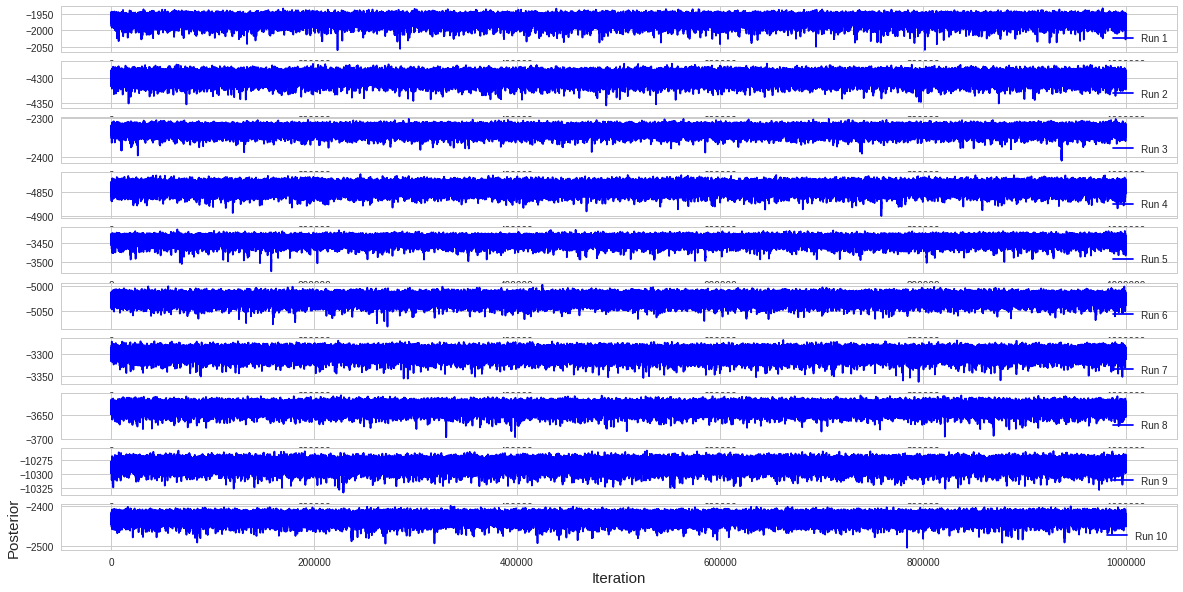

In [98]:
%matplotlib inline

fig, ax = plt.subplots(10, figsize=(20, 10))
p1, = ax[0].plot(d1['Iteration'], d1['Posterior'], 'b-')
p2, = ax[1].plot(d1['Iteration'], d2['Posterior'], 'b-')
p3, = ax[2].plot(d1['Iteration'], d3['Posterior'], 'b-')
p4, = ax[3].plot(d1['Iteration'], d4['Posterior'], 'b-')
p5, = ax[4].plot(d1['Iteration'], d5['Posterior'], 'b-')
p6, = ax[5].plot(d1['Iteration'], d6['Posterior'], 'b-')
p7, = ax[6].plot(d1['Iteration'], d7['Posterior'], 'b-')
p8, = ax[7].plot(d1['Iteration'], d8['Posterior'], 'b-')
p9, = ax[8].plot(d1['Iteration'], d9['Posterior'], 'b-')
p10, = ax[9].plot(d1['Iteration'], d10['Posterior'], 'b-')

#cal, = ax[1].plot(d2['Iteration'], d2['Posterior'], 'g-')
#con, = ax[2].plot(d3['Iteration'], d3['Posterior'], 'r-')

ax[0].legend([p1], ['Run 1'], loc='lower right')
ax[1].legend([p2], ['Run 2'], loc='lower right')
ax[2].legend([p3], ['Run 3'], loc='lower right')
ax[3].legend([p4], ['Run 4'], loc='lower right')
ax[4].legend([p5], ['Run 5'], loc='lower right')
ax[5].legend([p6], ['Run 6'], loc='lower right')
ax[6].legend([p7], ['Run 7'], loc='lower right')
ax[7].legend([p8], ['Run 8'], loc='lower right')
ax[8].legend([p9], ['Run 9'], loc='lower right')
ax[9].legend([p10], ['Run 10'], loc='lower right')

#ax[1].legend([cal], ['Run 2'], loc='lower right')
#ax[2].legend([con], ['Run 3'], loc='lower right')

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Posterior", fontsize=15);

### Partial conclusion on the above
For run 9, the posterior values are much different than for the other ones, which may suggest a problem for this run. However, I checked all the other runs involving tree 9, and they all are in the same ballpark (around -10250, -10300), so it must have something to do with run 9 in general, not just when using all constraints. So overall, all seem OK given this limited amount of information.

# Conclusion

From these analyses, I would say:
* Mixing of the MCMC does not seem too worrysome.
* Calibrations help a lot.
* Constraints help too, but probably a bit less. In particular, they have less of an effect on the reduction of 95% HPD. They tend to help for node age correlation, but not as much for branch lengths and rmsd.
* However, using all constraints does produce good chronograms according to the metrics I used.
* Focusing on easy trees or on the hard trees does not help much, although it seems like constraints may help a little bit more on easier trees. But given that constraints have their greatest impact on node age correlation, and that those correlations are very good on easy trees, it's not clear performing more easy simulations is going to help characterize the effect of constraints.